In [2]:
# =======Importing the libraries=======

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import Imputer,LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm

from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix

In [3]:
# =======Useful functions=======

def simplifyQTY(data):
    temp = data.replace('M3','').rstrip()
    temp = temp.replace('m3','').rstrip()
    return float(temp)

def normalizeConcSRC(data):
    if "ACC" in data:
        return "ACC"
    else:
        return data
    
def categoriesStrength(row):
    
    if 0 <= row['Comp. Strength in %'] < 100:
        return 0
    
    if 100 <= row['Comp. Strength in %']:
        return 1
    
def removeUnderscore(data):
    temp = data.replace('-','').rstrip()
    return temp

In [4]:
# =======Importing the dataset=======
dataset = pd.read_csv('cube.csv')

In [5]:
# =======Data Preporcessing==========

# removing last row as it contains Na in every col
dataset.drop(dataset.index[len(dataset)-1], inplace=True)    

# removing the metric unit and converting data into float
dataset['Qty.'] = dataset['Qty.'].apply(simplifyQTY)

# uniforming the data, for eg: T5 and T-5 are smiliar but different format, 
dataset['Concrete Grade'] = dataset['Concrete Grade'].apply(removeUnderscore)

dataset['Concrete Source'] = dataset['Concrete Source'].apply(normalizeConcSRC)

# making ranges(>100 & <100) from numeric data
dataset['category'] = dataset.apply (lambda row: categoriesStrength (row),axis=1)    

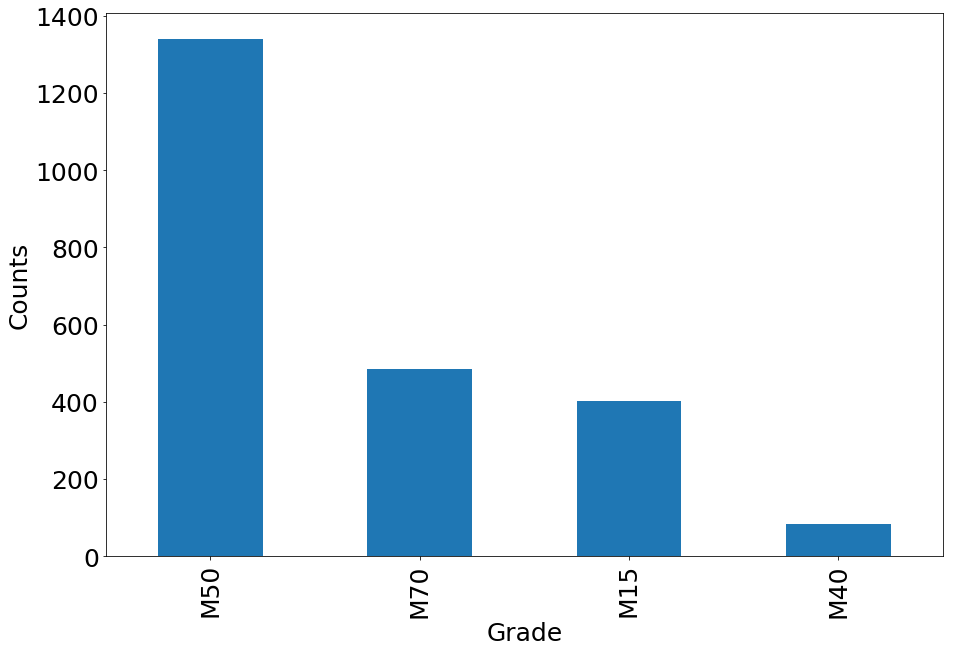

In [6]:
# ================================================ Data Exploration ======================================================

# Concrete grade feature
dataset['Concrete Grade'].value_counts().plot(kind='bar',figsize=(15,10),fontsize = 25)
plt.xlabel('Grade', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.show()


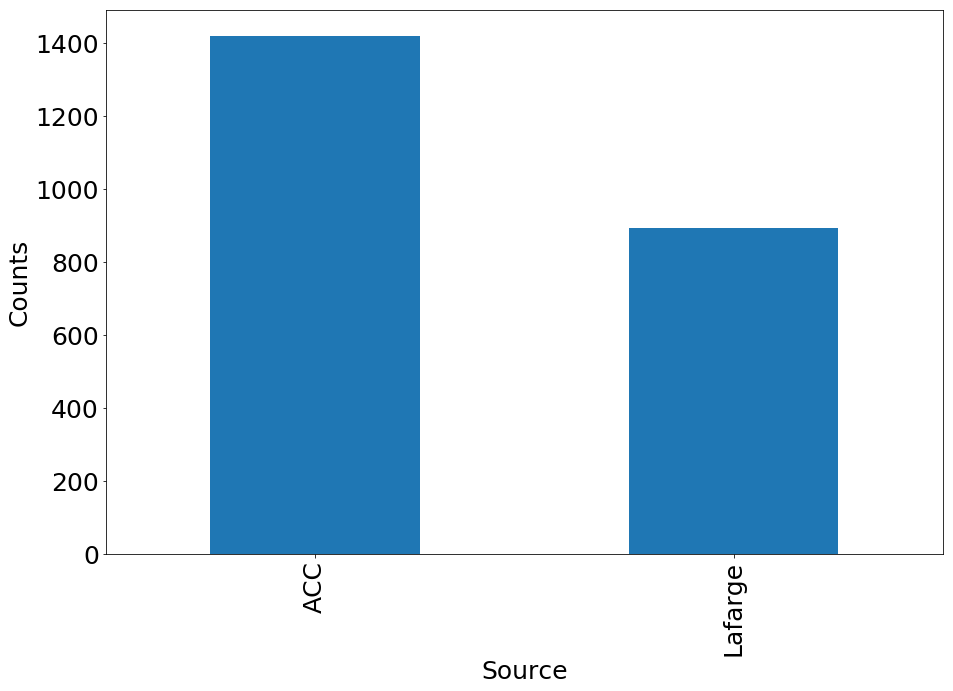

In [7]:
# Concrete Source feature
dataset['Concrete Source'].value_counts().plot(kind='bar',figsize=(15,10),fontsize = 25)
plt.xlabel('Source', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.show()

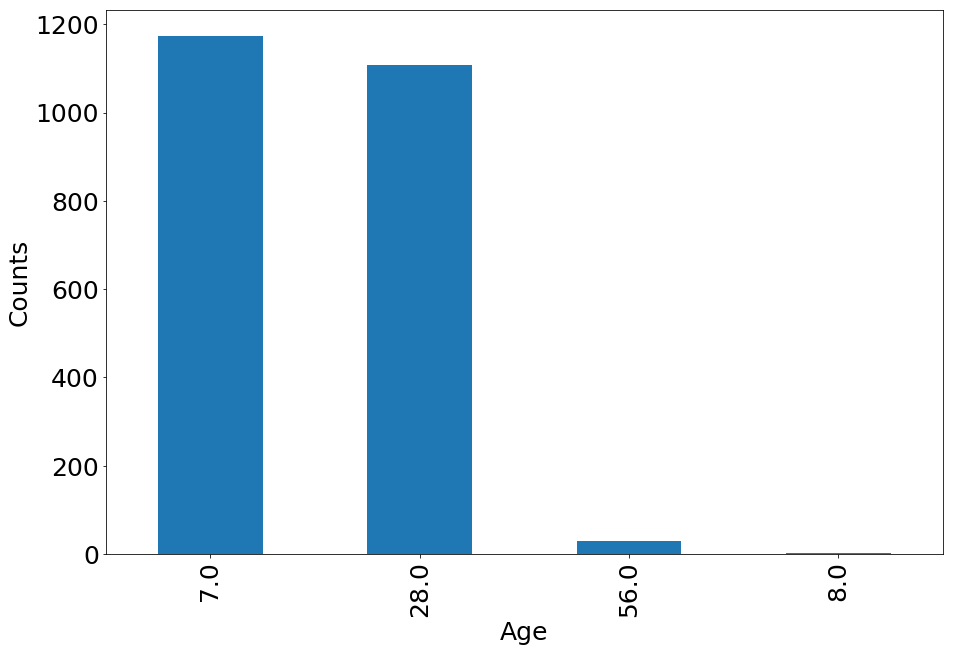

In [10]:
# Age feature
dataset['Age'].value_counts().plot(kind='bar',figsize=(15,10),fontsize = 25)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.show()

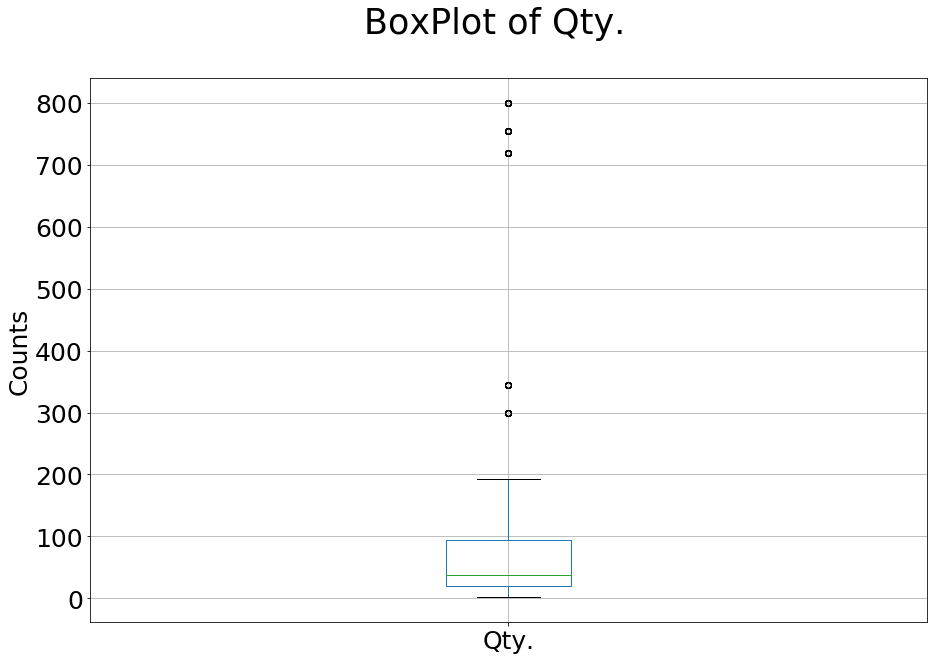

In [8]:
# Qty. Boxplot
dataset.boxplot(column="Qty.",figsize=(15,10),fontsize=25)
plt.suptitle("BoxPlot of Qty.", fontsize=35)
plt.ylabel('Counts', fontsize=25)
plt.show()

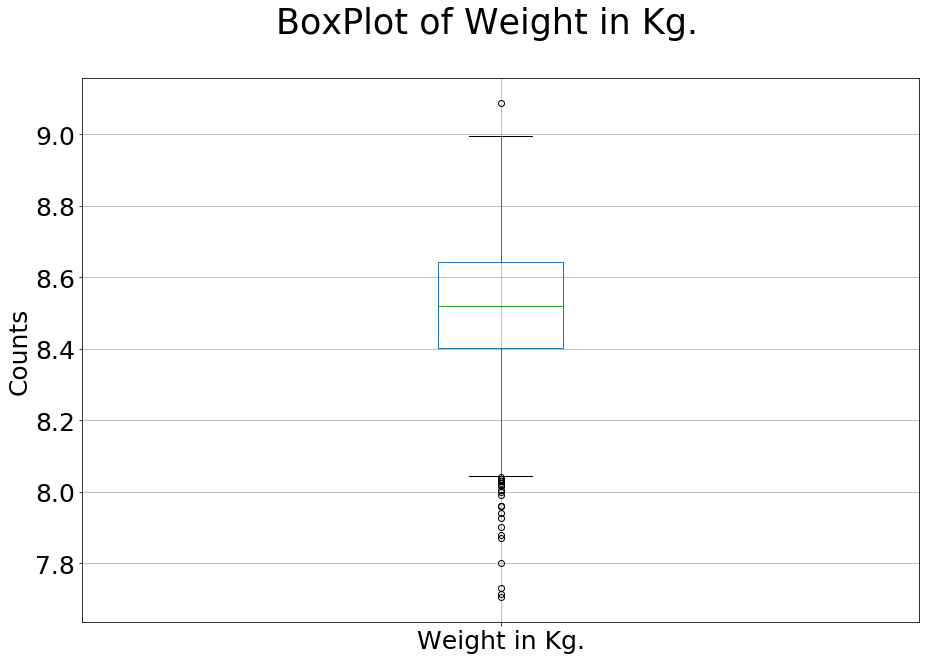

In [11]:
# Weight in Kg. Boxplot
dataset.boxplot(column="Weight in Kg.",figsize=(15,10),fontsize=25)
plt.suptitle("BoxPlot of Weight in Kg.", fontsize=35)
plt.ylabel('Counts', fontsize=25)
plt.show()

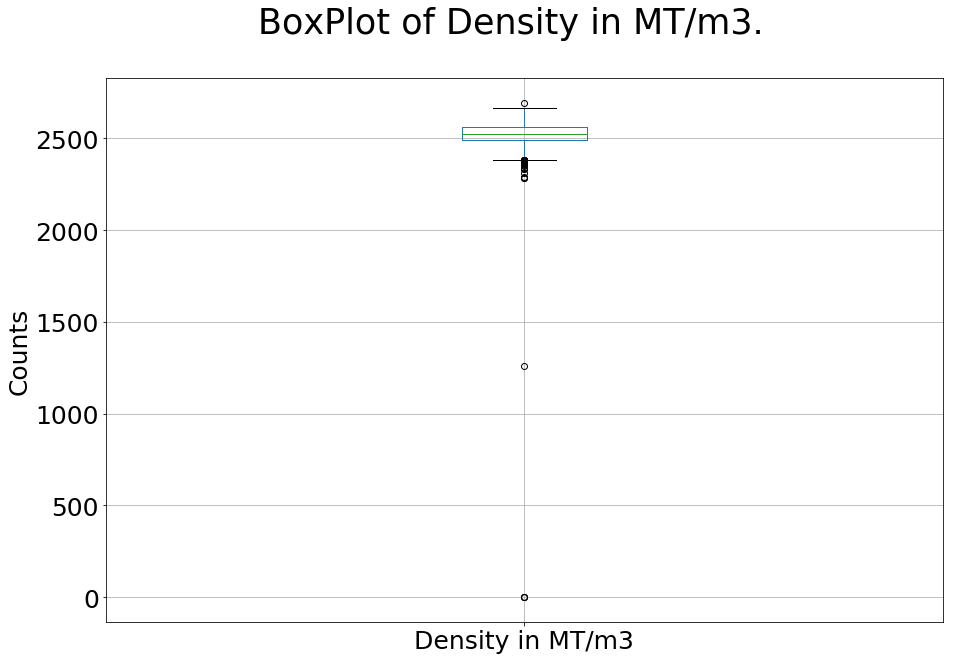

In [12]:
# Density in MT/m3 Boxplot
dataset.boxplot(column="Density in MT/m3",figsize=(15,10),fontsize=25)
plt.suptitle("BoxPlot of Density in MT/m3.", fontsize=35)
plt.ylabel('Counts', fontsize=25)
plt.show()

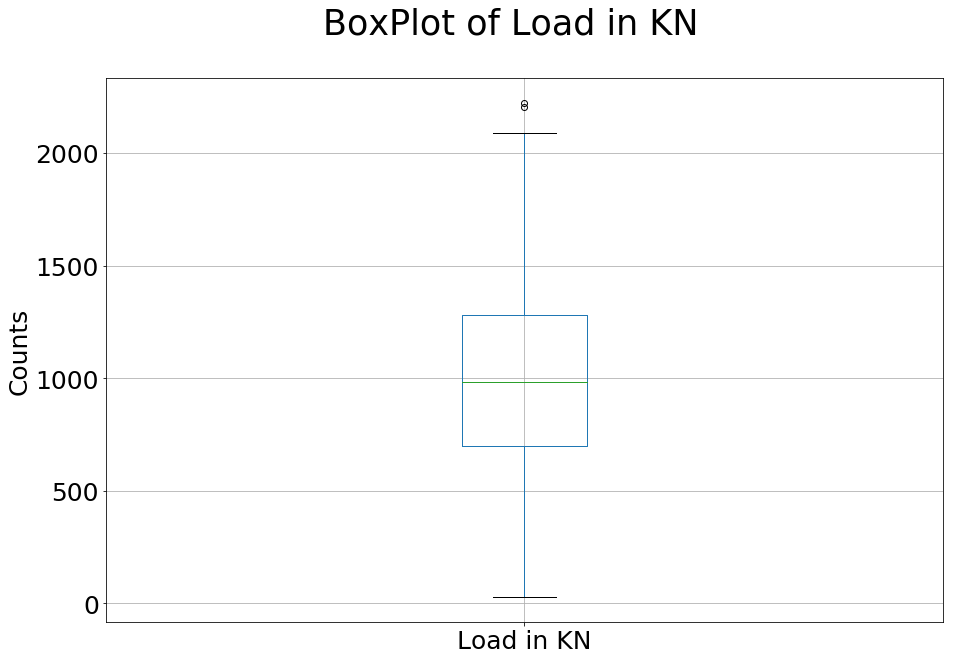

In [13]:
# Load in KN Boxplot
dataset.boxplot(column="Load in KN",figsize=(15,10),fontsize=25)
plt.suptitle("BoxPlot of Load in KN", fontsize=35)
plt.ylabel('Counts', fontsize=25)
plt.show()

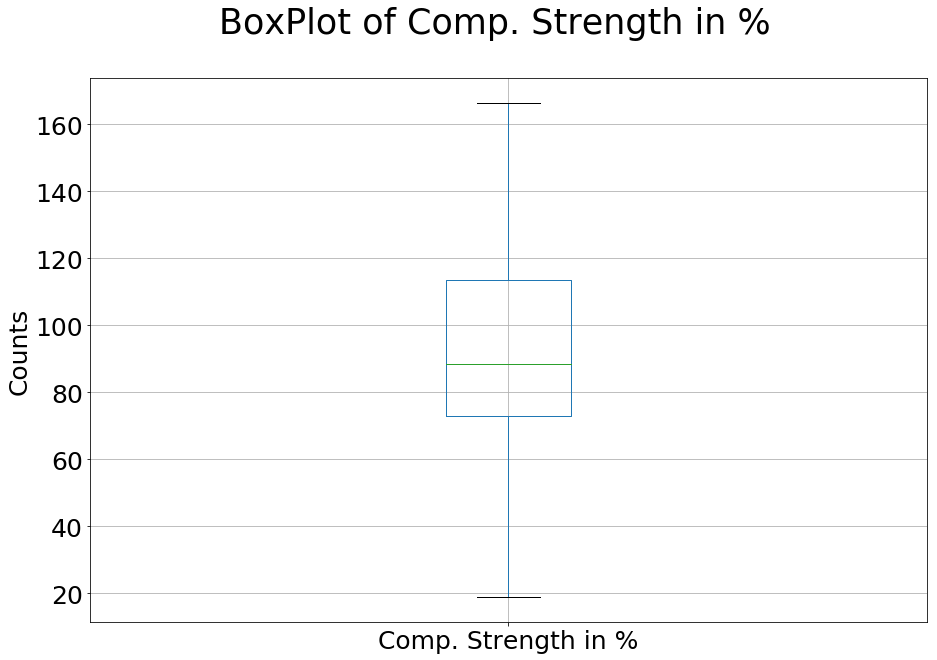

In [16]:
# Comp. Strength in % Boxplot
dataset.boxplot(column="Comp. Strength in %",figsize=(15,10),fontsize=25)
plt.suptitle("BoxPlot of Comp. Strength in %", fontsize=35)
plt.ylabel('Counts', fontsize=25)
plt.show()

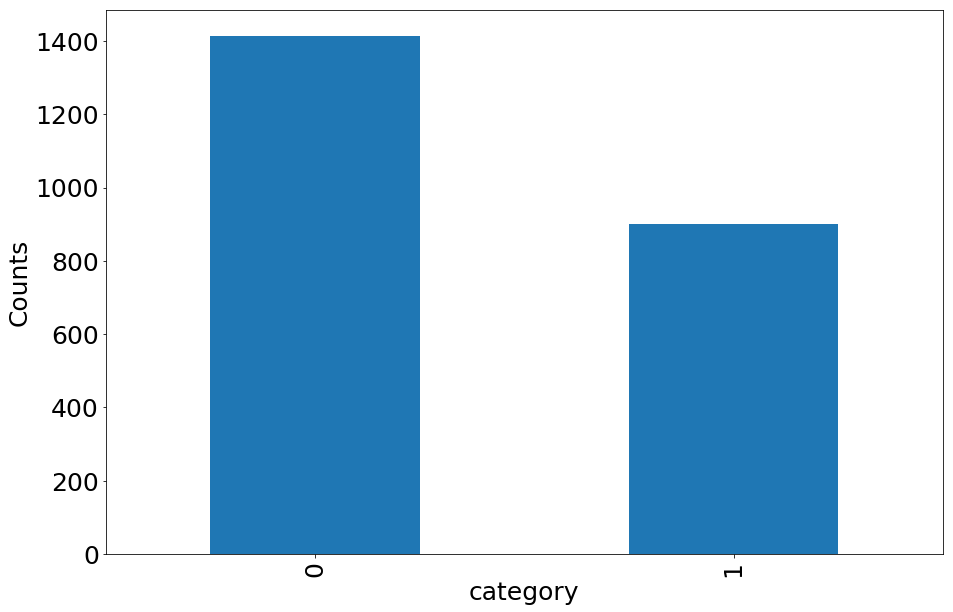

In [17]:
# category grade feature
dataset['category'].value_counts().plot(kind='bar',figsize=(15,10),fontsize = 25)
plt.xlabel('category', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.show()

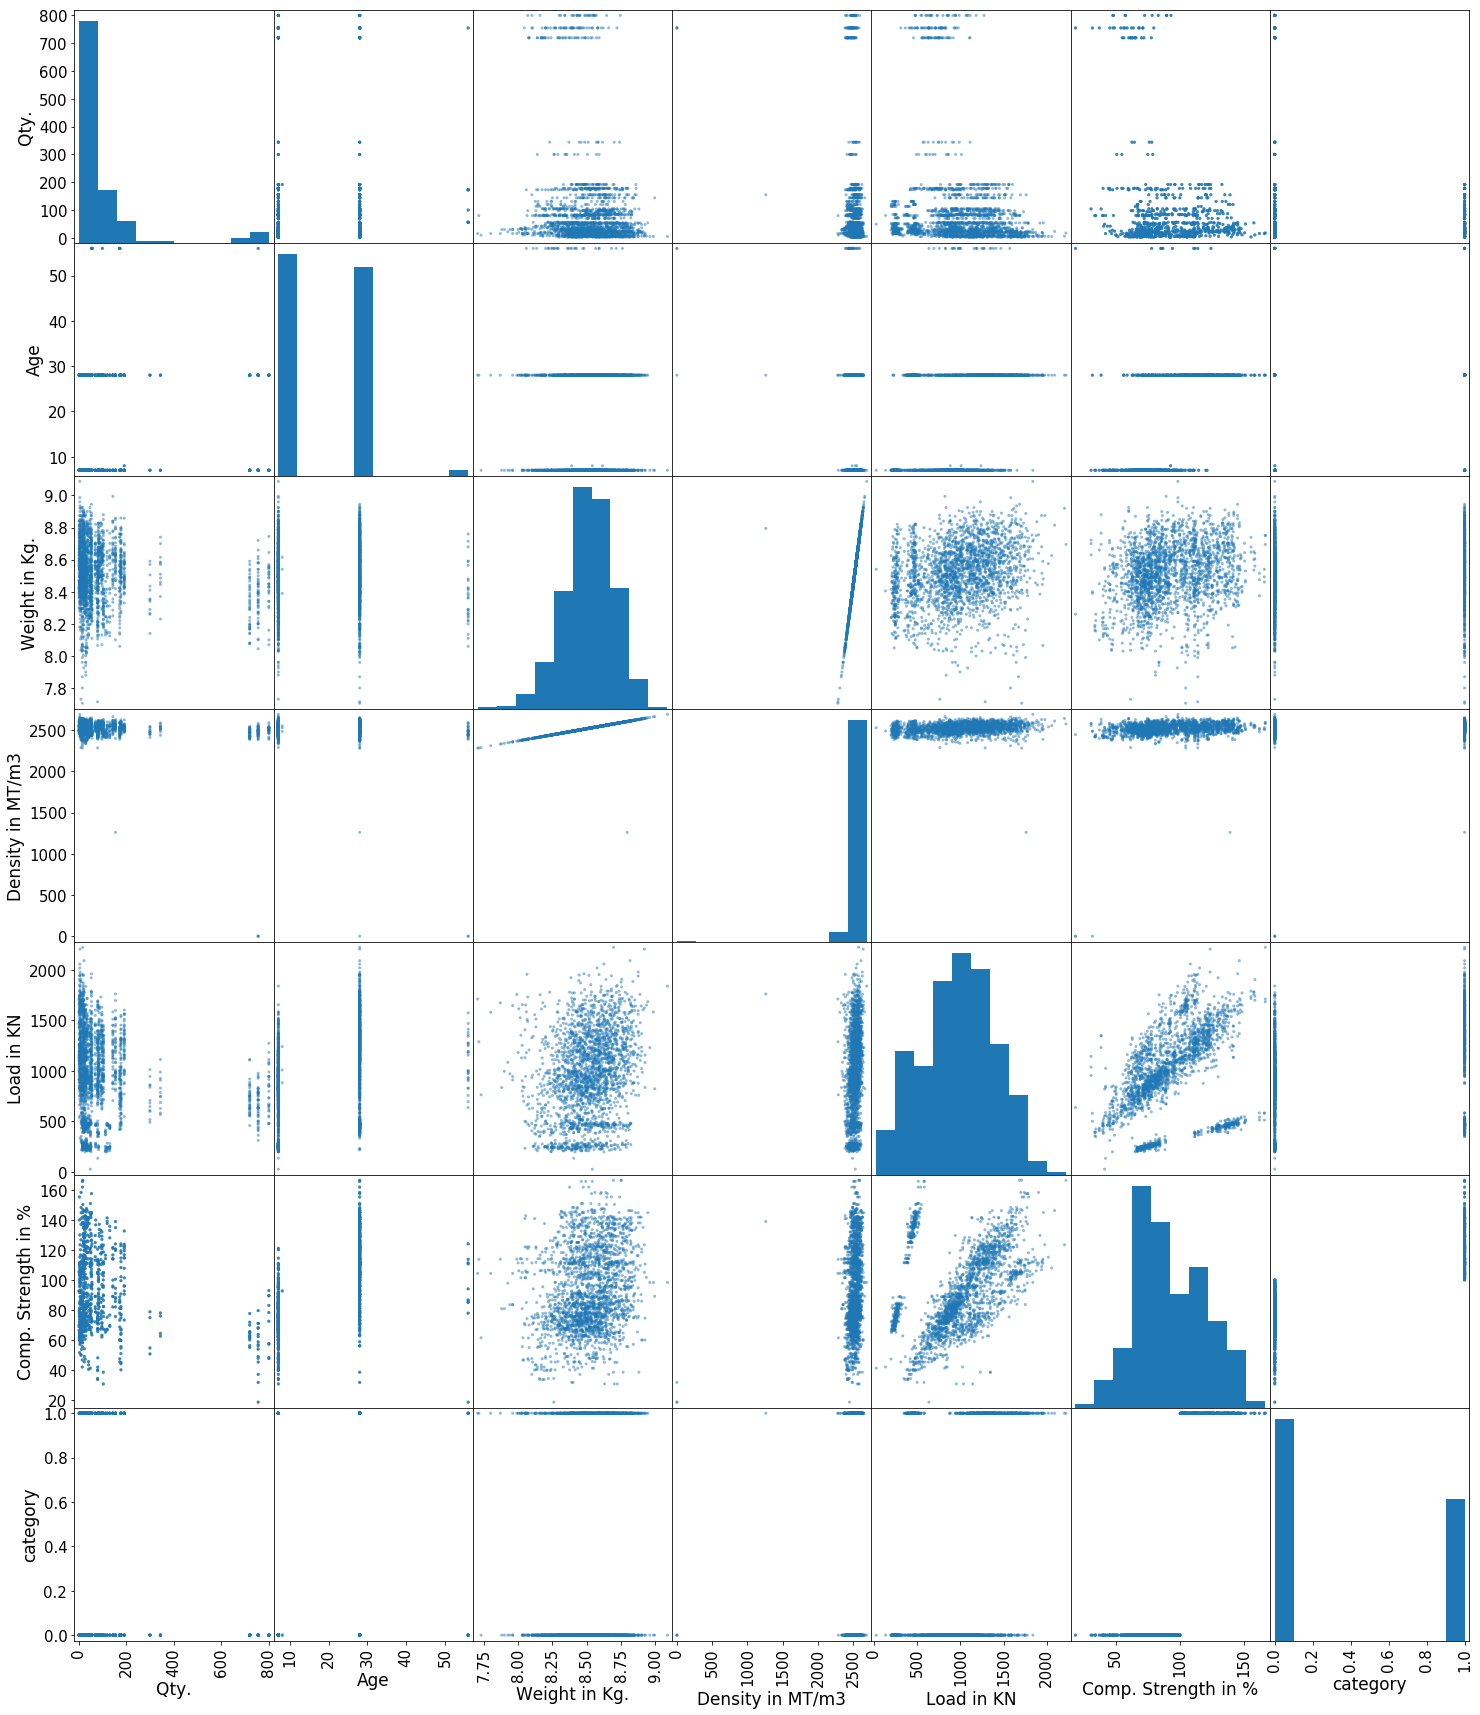

In [19]:
Axes = scatter_matrix(dataset[['Concrete Grade', 'Concrete Source', 'Qty.', 'Age', 'Weight in Kg.',
       'Density in MT/m3', 'Load in KN', 'Comp. Strength in %', 'category']],figsize=(25,30))

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 17) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 17) for item in Axes.ravel()]

plt.show()

In [20]:
# Sperating dependent and independent variable in X and y respectively
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -1].values

In [21]:
# taking care of missing data
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, [2,4,5,6]])
X[:, [2,4,5,6]] = imputer.transform(X[:, [2,4,5,6]])

In [22]:
# hot encoding of categorical  variable
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [0,1,3])
X = onehotencoder.fit_transform(X).toarray()

In [23]:
# to avoid dummy trap
X = np.delete(X, 0, 1) 
X = np.delete(X, 3, 1)
X = np.delete(X, 4, 1)

In [24]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# ================================================ Data Modelling: Model 1 ======================================================

# Fitting Logistic Regression to the Training set
classifierLR = LogisticRegression(random_state = 0)
classifierLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred_LR = classifierLR.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix \n",confusion_matrix(y_test, y_pred_LR))

Confusion Matrix 
 [[266  13]
 [ 13 171]]


In [30]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifierLR, X = X_train, y = y_train, cv = 10)
print("Accuracy: {}%".format(round(accuracies.mean()*100, 2))) 
print("Accuracy STD: {}%".format(round(accuracies.std()*100, 2)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_LR), 2)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_LR), 2)))
print("F1 Score: {}".format(round(f1_score(y_test, y_pred_LR), 2)))

Accuracy: 93.78%
Accuracy STD: 1.86%
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [32]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = classifierLR,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)

print("Grid Search result: Best Score = {}% Best Param = {}".format(round(grid_search.best_score_*100, 2),grid_search.best_params_))

Grid Search result: Best Score = 93.84% Best Param = {'C': 10}


In [ ]:
# Grid search suggests that if we take C=10 
# we can further increase the accuracy but just by a fraction only i.e from 93.78% to 93.83%
# So we will not make any more effort to make new model with above params and this is our final model.

In [42]:
# We can go further with dimensionality reduction to see if there is any scope of improvement.
# Intitution behind taking dimensionality in consideration is that not all feature help in getting good result sometimes, 
# so we will check if its possible to improve model by reducing the dimensionalty to 2

# ===========Applying PCA=================
pca = PCA(n_components = 2)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
classifierLR_PCA = LogisticRegression(random_state = 0)
classifierLR_PCA.fit(X_train_PCA, y_train)

# Predicting the Test set results
y_pred_PCA = classifierLR_PCA.predict(X_test_PCA)

# Making the Confusion Matrix
print("Confusion Matrix \n",confusion_matrix(y_test, y_pred_PCA))

Confusion Matrix 
 [[237  42]
 [ 82 102]]


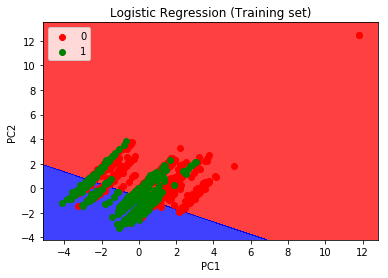

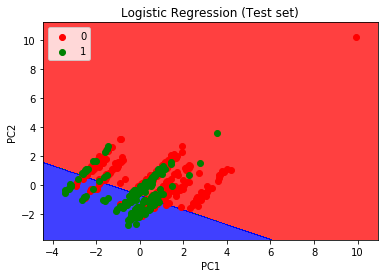

In [34]:
# As we have got dimensionality reduced to 2, that will be easy to visualize the data and prediction boundaries, 
# and also check if data is linearly seperable or not

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_PCA, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierLR_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_PCA, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierLR_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [43]:
# Actually, it has given worse accuracy, that means all feature are important in taking desicion in this particular case of ours
# So instead of reducing all the features to 2 abrubtly, we will implement Backward elimination method. 
# Intuition behind BE is that to check significance level of each feature, and decide whether to take that feature in modeling or not
# In other words, will that feature actually contribute in making decision or just making it worse
# Initially we set a SL, lets say 0.05 then we check p value of all feature, select the highest p value and if its greater than SL
    # we will drop that feature
    # will demonstrate one run below


regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     758.3
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        01:36:36   Log-Likelihood:                -598.15
No. Observations:                2313   AIC:                             1214.
Df Residuals:                    2304   BIC:                             1266.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1863      0.040     -4.676      0.000      -0.264      -0.108
x2            -0.0640      0.020     -3.253      0.001      -0.103      -0.025
x3            -0.2510      0.025    -10.245      0.000      -0.299      -0.203
x4             0.0703      0.016      4.340      0.000       0.039       0.102
x5             0.0080      0.182      0.044      0.965      -0.348       0.364
x6             0.7077      0.013     53.661      0.000       0.682       0.734
x7             0.4016      0.059      6.853      0.000       0.287       0.517
x8            -0.0006   4.35e-05    -13.918      0.000      -0.001      -0.001
x9             0.0202      0.002     10.025      0.000       0.016       0.024
==============================================================================
Omnibus:                      142.049   Durbin-Watson:                   0.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.732
Skew:                          -0.353   Prob(JB):                     4.19e-77
Kurtosis:                       4.775   Cond. No.                     5.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# As we can see that the p value of x5 variable is highest and greater than SL, we will drop it 
# and repeat the process untill we get all p values less than SL
# it will be a long process to do it step by step manually, so below is the code for automation of backward elimination

In [49]:
# ============Backward elimination===============
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, 0:11]
X_Modeled = backwardElimination(X_opt, SL)

print("Number of features left after backward elimination: {}".format(len(X_Modeled[0])))

Number of features left after backward elimination: 8


In [57]:
# Its hard to detect which categorical feature got drop but we can see that only QTY and Load in KN have been left
print(X_Modeled[0,:],"\n",X[0,:])

[   0.     0.     0.     0.     0.     0.    84.   243.5] 
 [    0.             0.             0.             0.             0.             0.
     0.            84.             8.73        2586.66666667   243.5       ]


In [60]:
# So this method reduced number of features to 8, lets try to fit the model on new set of independent variables i.e X_Modeled

# train and test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_Modeled, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train_reduced = sc.fit_transform(X_train_reduced)
X_test_reduced = sc.transform(X_test_reduced)

# Fitting Logistic Regression to the Training set
classifier_reduced = LogisticRegression(random_state = 0)
classifier_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = classifier_reduced.predict(X_test_reduced)

# Making the Confusion Matrix
print("Confusion Matrix \n",confusion_matrix(y_test_reduced, y_pred_reduced))

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier_reduced, X = X_train_reduced, y = y_train_reduced, cv = 10)
print("Accuracy: {}%".format(round(accuracies.mean()*100, 2))) 
print("Accuracy STD: {}%".format(round(accuracies.std()*100, 2)))

Confusion Matrix 
 [[266  13]
 [ 14 170]]
Accuracy: 93.73%
Accuracy STD: 1.97%


In [ ]:
# Backward Elimination also didnt helo to improve performance. We are still at 93.73% accuracy

In [61]:
# ================================================ Data Modelling: Model 2 ======================================================
# As we have selected a linear model before, lets try with non linear model, eg: Kernel SVM(Gaussian)
# data has been imported and cleaned aready. we will start with modelling straightly

# Fitting Kernel SVM to the Training set
classifierSVM = SVC(kernel = 'rbf', random_state = 0)
classifierSVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
# Predicting the Test set results
y_pred_SVM = classifierSVM.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix \n",confusion_matrix(y_test, y_pred_SVM))

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 10)
print("Final Accuracy: {}%".format(round(accuracies.mean()*100, 2))) 
print("Final Accuracy STD: {}%".format(round(accuracies.std()*100, 2)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_SVM), 2)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_SVM), 2)))
print("F1 Score: {}".format(round(f1_score(y_test, y_pred_SVM), 2)))

Confusion Matrix 
 [[264  15]
 [ 16 168]]
Final Accuracy: 93.57%
Final Accuracy STD: 2.48%
Precision: 0.92
Recall: 0.91
F1 Score: 0.92


In [65]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifierSVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Grid Search result: Best Score = {}% Best Param = {}".format(round(grid_search.best_score_*100, 2),grid_search.best_params_))

Grid Search result: Best Score = 0.94 Best Param = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Grid search suggests that if we take 'C': 100, 'gamma': 0.1 
# we can further increase the accuracy but just by a fraction only i.e from 93.57% to 94%
# So we will not make any more effort to make new model with above params and this is our final model.

In [67]:
# ================================================ Data Modelling: Model 3 ======================================================

# Fitting Random Forest Classification to the Training set
classifierRM = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRM.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [76]:
# Predicting the Test set results
y_pred_RM = classifierRM.predict(X_test)

# Making the Confusion Matrix
print("Confusion Matrix \n",confusion_matrix(y_test, y_pred_RM))

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifierRM, X = X_train, y = y_train, cv = 10)
print("Final Accuracy: {}%".format(round(accuracies.mean()*100, 2))) 
print("Final Accuracy STD: {}%".format(round(accuracies.std()*100, 2)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_RM), 2)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_RM), 2)))
print("F1 Score: {}".format(round(f1_score(y_test, y_pred_RM), 2)))

Confusion Matrix 
 [[271   8]
 [ 16 168]]
Final Accuracy: 94.0%
Final Accuracy STD: 1.41%
Precision: 0.95
Recall: 0.91
F1 Score: 0.93


In [74]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{'n_estimators': [1, 10, 100, 1000], 'criterion': ['entropy']},
              {'n_estimators': [1, 10, 100, 1000], 'criterion': ['gini']}]
grid_search = GridSearchCV(estimator = classifierRM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Grid Search result: Best Score = {}% Best Param = {}".format(round(grid_search.best_score_*100, 2),grid_search.best_params_))

Grid Search result: Best Score = 94.86% Best Param = {'criterion': 'gini', 'n_estimators': 100}


In [ ]:
# Grid search suggests that if we take 'criterion': 'gini', 'n_estimators': 100
# we can further increase the accuracy but just by a fraction only i.e from 94% to 94.86%
# So we will not make any more effort to make new model with above params and this is our final model.

In [ ]:
# ============================== Final Comments =====================================

# All model performed well with accuracies around 94%
# we can provide a portal to the company, which can help to predict/or get intuition 
# about how much strength can be acheive by given combinations of features
# before actually building it